In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap
import pickle
from scipy.spatial.distance import squareform
import os
import math
import pandas as pd
import tqdm

In [3]:
CNN_por_cm = np.load('/home/lijy/workspace/sustag/training/output/final/cnn_sustag96_without0_confusion_matrix_nonorm.npy')
CNN_cm = np.load('/home/lijy/workspace/sustag/training/output/final/cnn_sustag96_confusion_matrix.npy')
CNNLSTM_cm = np.load('/home/lijy/workspace/sustag/training/output/sustag96/cnnlstm_sustag96_alltest_confusion_matrix_nonorm.npy')

# ORCovL_cm = np.load('/home/lijy/workspace/sustag/training/output/sustag96/sustag96_c100_alltest_confusion_matrix_nonorm.npy')
# ORCovL_cm = np.load('/home/lijy/workspace/sustag/training/output/sustag96/sustag96_c95_alltest_confusion_matrix_nonorm.npy')

In [5]:
def norm_per_row(confusion_matrix):
    row_sums = confusion_matrix.sum(axis=1, keepdims=True)
    normalized_matrix = confusion_matrix / row_sums
    return normalized_matrix

In [6]:
CNN_por_cm_norm = norm_per_row(CNN_por_cm)
CNN_cm_norm = norm_per_row(CNN_cm)
CNNLSTM_cm_norm = norm_per_row(CNNLSTM_cm)
# ORCovL_cm_norm = norm_per_row(ORCovL_cm)

Loaded from .npy file:
 [[8.66046512e-01 0.00000000e+00 9.30232558e-04 ... 0.00000000e+00
  9.30232558e-04 1.86046512e-03]
 [5.20833333e-03 9.89583333e-01 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [8.04289544e-03 0.00000000e+00 9.70509383e-01 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 ...
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 9.94565217e-01
  0.00000000e+00 0.00000000e+00]
 [2.68817204e-03 0.00000000e+00 2.68817204e-03 ... 0.00000000e+00
  9.75806452e-01 0.00000000e+00]
 [9.43396226e-03 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 9.85849057e-01]]
(97, 97)
(97, 97)
(97, 97)


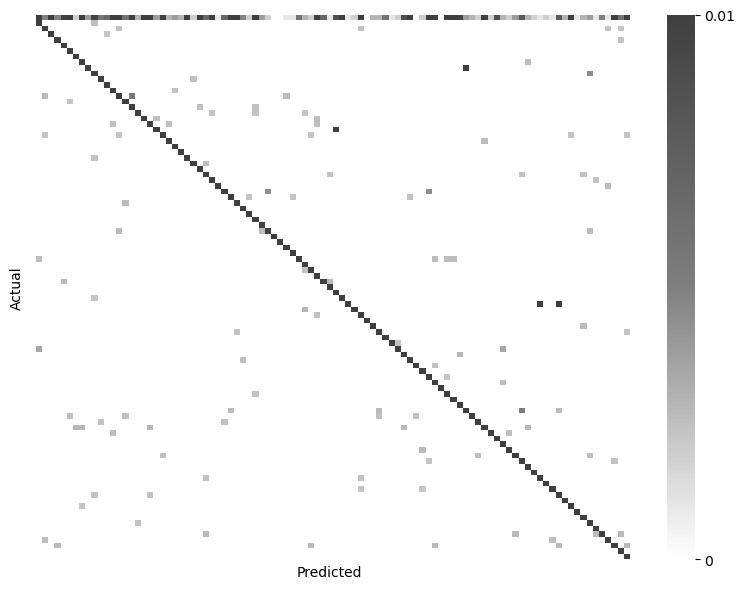

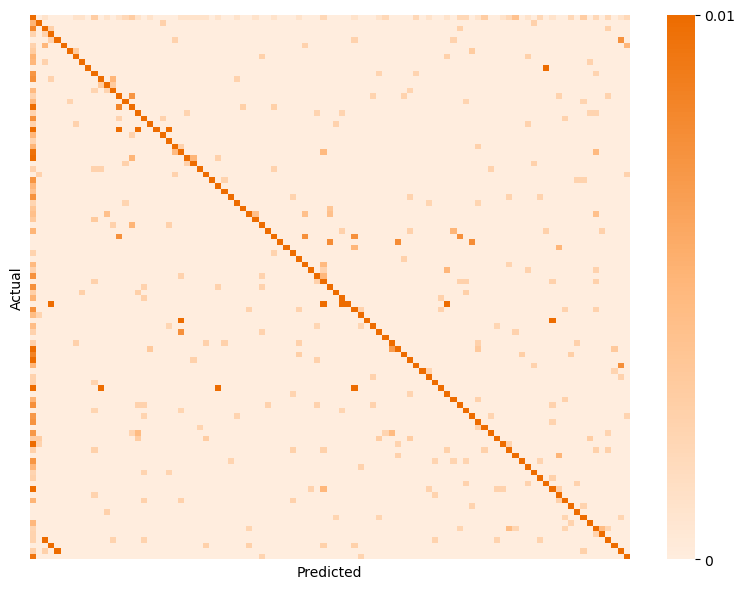

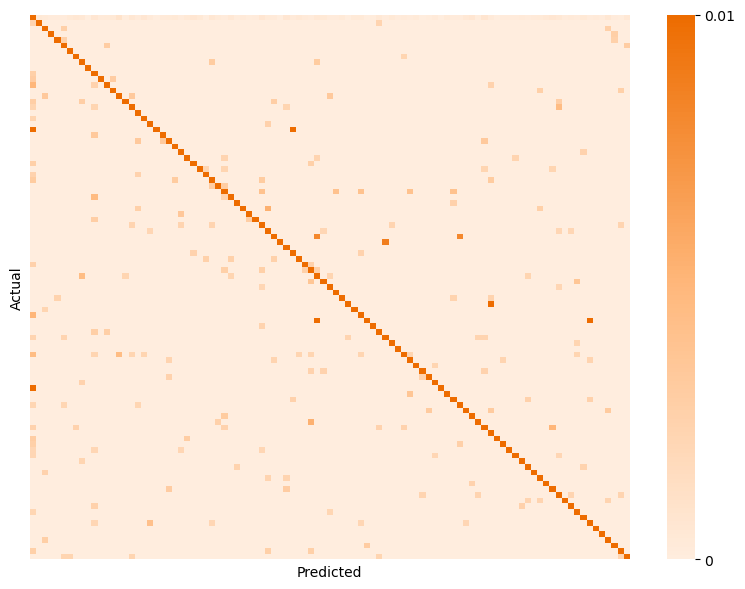

In [9]:
cms = [CNN_por_cm_norm, CNN_cm_norm, CNNLSTM_cm_norm]
labels = ['CNN_por', 'CNN', 'CNN_LSTM']
# custom_cmaps = [LinearSegmentedColormap.from_list("custom_cmap", ['#ffedde', '#ffb87c', '#ed6c00'], N=128),
#                 LinearSegmentedColormap.from_list("custom_cmap", ['#ffedde', '#ffb87c', '#ed6c00'], N=128),
#                 LinearSegmentedColormap.from_list("custom_cmap", ['#ffedde', '#ffb87c', '#ed6c00'], N=128),
#                ]

custom_cmaps = [LinearSegmentedColormap.from_list("custom_cmap", ['#ffffff', '#7f7f7f', '#3f3f3f'], N=128),
                LinearSegmentedColormap.from_list("custom_cmap", ['#ffedde', '#ffb87c', '#ed6c00'], N=128),
                LinearSegmentedColormap.from_list("custom_cmap", ['#ffedde', '#ffb87c', '#ed6c00'], N=128),
               ]

print("Loaded from .npy file:\n", CNN_cm)

# original_cmap = plt.get_cmap('bone_r')
# new_cmap = truncate_colormap(original_cmap, 0.1, 1.0)



def remove_trailing_zeros(x, pos):
    return ('%f' % x).rstrip('0').rstrip('.')


for i in range(len(cms)):

    cm_withoutun = cms[i]
    print(cm_withoutun.shape)
    
    plt.figure(figsize=(8, 6))
    vmin=0
    vmax=0.01
    ax = sns.heatmap(cm_withoutun, cmap=custom_cmaps[i], annot=False, vmin=vmin, vmax=vmax)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    # 去除x轴和y轴的刻度
    plt.xticks([])
    plt.yticks([])
    
    ticks = np.linspace(vmin,vmax,num=2)
    colorbar = ax.collections[0].colorbar
    colorbar.set_ticks(ticks)
    colorbar.set_ticklabels([remove_trailing_zeros(x, None) for x in ticks])
    
    # plt.title('Porcupine Confusion Matrix')
    plt.tight_layout()
    plt.savefig(f'./{labels[i]}_cm_97class.png', format='png', dpi=500)

In [10]:
ORCovL_cm = np.load('/home/lijy/workspace/sustag/training/output/sustag96/sustag96_c95_confusion_matrix_select.npy')
ORCovL_cm

array([[871,   0,   0, ...,   0,   1,   0],
       [  0, 386,   0, ...,   0,   0,   0],
       [  0,   0, 412, ...,   0,   0,   0],
       ...,
       [  0,   0,   0, ..., 364,   0,   0],
       [  0,   0,   0, ...,   0, 322,   0],
       [  0,   0,   0, ...,   0,   0, 365]])

In [11]:
from sklearn.metrics import precision_recall_fscore_support
import numpy as np

In [12]:
def generate_y_true_y_pred(conf_matrix):
    y_true = []
    y_pred = []
    
    num_classes = conf_matrix.shape[0] 

    for i in range(num_classes):
        for j in range(num_classes):
            count = conf_matrix[i, j] 
            y_true.extend([i] * count)  
            y_pred.extend([j] * count) 
    
    return np.array(y_true), np.array(y_pred)

In [13]:
y_true, y_pred = generate_y_true_y_pred(ORCovL_cm)
    
precision, recall, f1, _ = precision_recall_fscore_support(y_true, y_pred, average='weighted')

In [14]:
print(precision, recall ,f1)

0.9968142460131277 0.9968006398720256 0.9968000651230089


In [15]:
porcupine_cm = np.load('/home/lijy/workspace/sustag/training/output/porcupine/porcupine_c95_confusion_matrix_select.npy')
ont_cm = np.load('/home/lijy/workspace/sustag/training/output/ONT/ont_c95_confusion_matrix_select.npy')

In [16]:
y_true, y_pred = generate_y_true_y_pred(porcupine_cm)
precision, recall, f1, _ = precision_recall_fscore_support(y_true, y_pred, average='weighted')

In [17]:
print(precision, recall ,f1)

0.9893188330756163 0.9892504281385852 0.9892523615306015


In [18]:
y_true, y_pred = generate_y_true_y_pred(ont_cm)
precision, recall, f1, _ = precision_recall_fscore_support(y_true, y_pred, average='weighted')

In [19]:
print(precision, recall ,f1)

0.9926415895735613 0.9926024481106972 0.9926064127858804
